<ipython-input-8-b4723cf84aab>:24: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
<ipython-input-8-b4723cf84aab>:31: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D_filtered, ref=np.max), sr=sr, x_axis='time', y_axis='log')


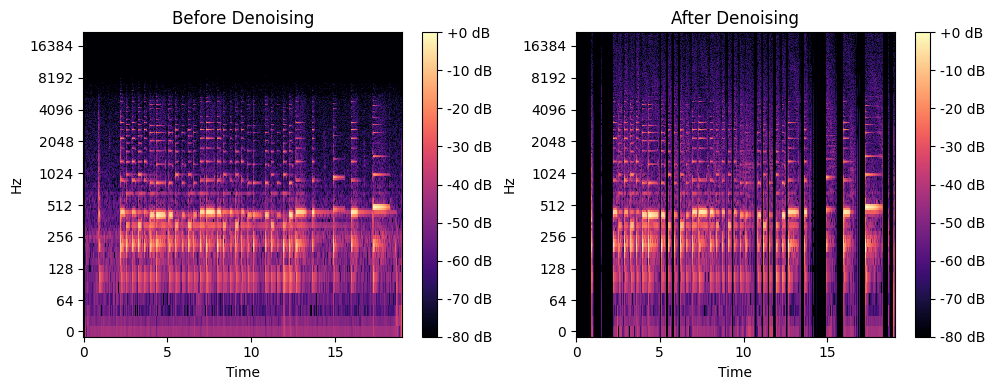

In [8]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Загрузка аудио файла
file_path = '/content/Record5.wav'
signal, sr = librosa.load(file_path, sr=None)

# Оценка уровня шума
noise_level = np.mean(np.abs(signal))

# Фильтрация шума
filtered_signal = np.where(np.abs(signal) < 0.45 * noise_level, 0, signal)

# Вычисление коротковременного преобразования Фурье (STFT) для фильтрованного сигнала
D_filtered = librosa.stft(filtered_signal, window='hann')

# Вычисление коротковременного преобразования Фурье (STFT) для исходного сигнала
D = librosa.stft(signal, window='hann')

# Построение спектрограммы до обработки
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title('Before Denoising')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# Построение спектрограммы после обработки
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_filtered, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title('After Denoising')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# Вывод спектрограмм
plt.show()

<ipython-input-5-755b4eb14494>:23: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')


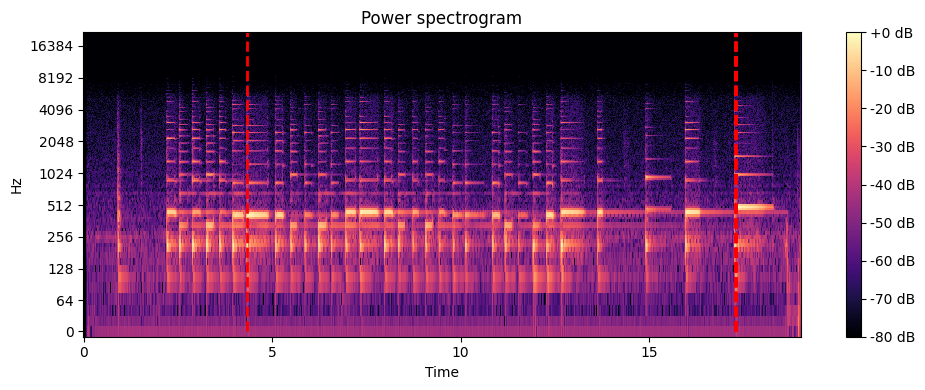

Моменты времени с наибольшей энергией:
17.29 сек
17.30 сек
17.28 сек
4.33 сек
17.31 сек


In [5]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Загрузка аудио файла
file_path = '/content/Record5.wav'
signal, sr = librosa.load(file_path, sr=None)

# Вычисление коротковременного преобразования Фурье (STFT)
D = librosa.stft(signal, window='hann')

# Вычисление энергии каждого короткого временного окна
energy = np.sum(np.abs(D)**2, axis=0)

# Нахождение моментов времени с наибольшей энергией
max_energy_indices = np.argsort(energy)[::-1][:5]  # Первые 5 максимальных значений энергии

# Преобразование моментов времени в секунды
time_points = librosa.frames_to_time(max_energy_indices, sr=sr)

# Построение спектрограммы
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# Выделение моментов времени с наибольшей энергией на спектрограмме
plt.vlines(time_points, 0, sr/2, colors='r', linestyle='--', linewidth=2)

# Вывод спектрограммы
plt.show()

# Вывод найденных моментов времени
print("Моменты времени с наибольшей энергией:")
for t in time_points:
    print(f"{t:.2f} сек")